<a href="https://colab.research.google.com/github/appsstuff/GoldPricePredictionDS/blob/main/Gold_price_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing the Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
from sklearn.impute import SimpleImputer


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Data Collection and Processing

In [ ]:
# loading the csv data to a Pandas DataFrame
gold_data = pd.read_csv('gold-price-commodites2024.csv')

In [ ]:
# print first 5 rows in the dataframe
gold_data.head()

,Date,gold,btc,eur,coil,boil,gas,copper,sliver
0,04/30/2024,2333.45,63499.0,1.07,82.41,86.98,2.06,4.66,26.95
1,04/29/2024,2357.70,63960.0,1.07,82.63,87.31,2.03,4.68,27.66
2,04/28/2024,2347.45,63226.0,1.07,83.22,87.57,1.95,4.59,27.50
3,04/26/2024,2335.00,63874.0,1.07,83.85,89.50,1.61,4.57,27.40
4,04/25/2024,2330.30,64555.0,1.07,83.57,89.01,1.64,4.53,27.50


In [ ]:
# print last 5 rows of the dataframe
gold_data.tail()

,Date,gold,btc,eur,coil,boil,gas,copper,sliver
2588,05/06/2014,1308.6,430.0,1.39,99.50,107.06,4.80,3.06,19.65
2589,05/05/2014,1309.3,427.0,1.39,99.48,107.72,4.69,3.05,19.57
2590,05/02/2014,1302.9,453.5,1.39,99.76,108.59,4.67,3.07,19.55
2591,05/01/2014,1283.4,459.0,1.39,99.42,107.76,4.72,3.02,19.04
2592,04/30/2014,1295.9,448.3,1.39,99.74,108.07,4.82,3.03,19.17


In [ ]:
# number of rows and columns
gold_data.shape

(2593, 9)

In [ ]:
# getting some basic informations about the data
gold_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2593 entries, 0 to 2592
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    2593 non-null   object 
 1   gold    2593 non-null   float64
 2   btc     2593 non-null   float64
 3   eur     2587 non-null   float64
 4   coil    2593 non-null   float64
 5   boil    2593 non-null   float64
 6   gas     2593 non-null   float64
 7   copper  2593 non-null   float64
 8   sliver  2576 non-null   float64
dtypes: float64(8), object(1)
memory usage: 182.4+ KB


In [ ]:
# checking the number of missing values
# Fill null values with a constant

# df_filled_constant = gold_data.fillna(value=0)
# df_interpolated = gold_data.interpolate()
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')

gold_data['btc']      = imputer.fit_transform(gold_data['btc'].to_numpy().reshape(-1,1))
gold_data['coil'] = imputer.fit_transform(gold_data['coil'].to_numpy().reshape(-1,1))
gold_data['boil'] = imputer.fit_transform(gold_data['boil'].to_numpy().reshape(-1,1))
gold_data['gas']      = imputer.fit_transform(gold_data['gas'].to_numpy().reshape(-1,1))
gold_data['copper']   = imputer.fit_transform(gold_data['copper'].to_numpy().reshape(-1,1))
gold_data['sliver']   = imputer.fit_transform(gold_data['sliver'].to_numpy().reshape(-1,1))


gold_data.isnull().sum()


Date      0
gold      0
btc       0
eur       6
coil      0
boil      0
gas       0
copper    0
sliver    0
dtype: int64

In [ ]:
# getting the statistical measures of the data
gold_data.describe()

,gold,btc,eur,coil,boil,gas,copper,sliver
count,2593.000000,2593.000000,2587.000000,2593.000000,2593.000000,2593.000000,2593.000000,2593.000000
mean,1524.063768,15487.938850,1.134028,63.149182,67.623948,3.228372,3.154606,19.346766
std,317.515461,17698.510594,0.070510,19.560355,20.018335,1.405358,0.715806,3.925568
min,1049.600000,183.000000,0.960000,-37.630000,19.330000,1.480000,1.940000,11.770000
25%,1250.300000,708.400000,1.090000,48.650000,51.870000,2.500000,2.630000,16.270000
50%,1349.900000,8213.400000,1.120000,59.720000,65.400000,2.820000,3.010000,17.860000
75%,1818.700000,26264.000000,1.170000,75.890000,80.780000,3.420000,3.760000,23.060000
max,2401.400000,72974.000000,1.390000,123.700000,127.980000,9.650000,4.940000,29.420000


Correlation:
1. Positive Correlation
2. Negative Correlation

In [ ]:
gold_data['Date'] = pd.to_datetime(gold_data['Date'])

correlation = gold_data.corr()

<Axes: >

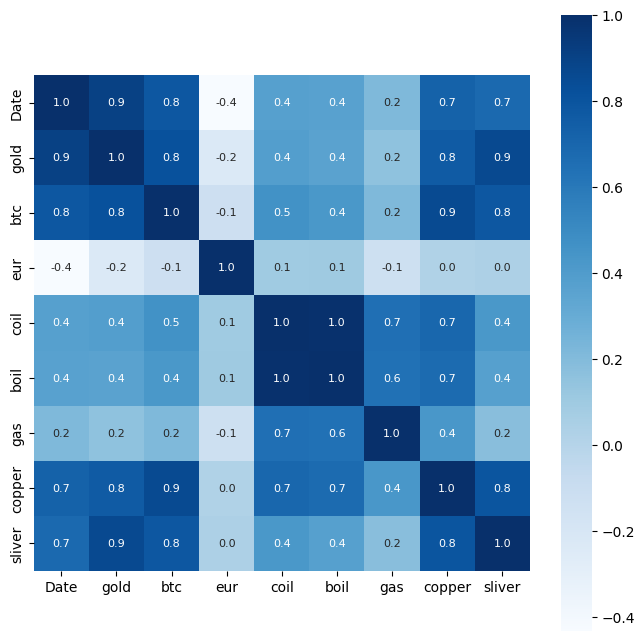

In [ ]:
# constructing a heatmap to understand the correlatiom
plt.figure(figsize = (8,8))
sns.heatmap(correlation, cbar=True, square=True, fmt='.1f',annot=True, annot_kws={'size':8}, cmap='Blues')

In [ ]:
# correlation values of GLD
print(correlation['gold'])

Date      0.908093
gold      1.000000
btc       0.815455
eur      -0.229956
coil      0.389905
boil      0.358658
gas       0.158556
copper    0.761366
sliver    0.864877
Name: gold, dtype: float64


In [ ]:
# checking the distribution of the GLD Price


X_Gold = gold_data.drop(['Date','gold'],axis=1)
Y_Gold = gold_data['gold']
X_train, X_test, Y_train, Y_test = train_test_split(X_Gold, Y_Gold, test_size = 0.2, random_state=2)
# sns.histplot(gold_data['gold'],color='blue')

# plt.ylabel('Gold')
# plt.xlabel('Gold Price')
plt.style.use('seaborn-whitegrid')
plt.title('Gold price. measured vs. predicted')

# ax = sns.histplot(X_train, bins=60, kde=True,color='Blue', label='Gold')
ax = sns.histplot(X_test, bins=60, kde=True,color='Red', label='Others')

ax.set(xlabel="Gold Price")
ax.set(ylabel="Gold Prediction")

ax.figure.set_size_inches(15, 15)

# sns.histplot(x1 , bins=60,  color='red', kde=True, label='pred')
# sns.histplot(y1 , bins=60,  color='Blue', kde=True, label='measured')
plt.legend()

<ipython-input-100-aeeb07a2bf04>:11: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')


Splitting the Features and Target

In [ ]:
X_Gold = gold_data.drop(['Date','gold'],axis=1)
Y_Gold = gold_data['gold']

In [ ]:
print(X_Gold)

          btc   eur   coil    boil   gas  copper  sliver
0     63499.0  1.07  82.41   86.98  2.06    4.66   26.95
1     63960.0  1.07  82.63   87.31  2.03    4.68   27.66
2     63226.0  1.07  83.22   87.57  1.95    4.59   27.50
3     63874.0  1.07  83.85   89.50  1.61    4.57   27.40
4     64555.0  1.07  83.57   89.01  1.64    4.53   27.50
...       ...   ...    ...     ...   ...     ...     ...
2588    430.0  1.39  99.50  107.06  4.80    3.06   19.65
2589    427.0  1.39  99.48  107.72  4.69    3.05   19.57
2590    453.5  1.39  99.76  108.59  4.67    3.07   19.55
2591    459.0  1.39  99.42  107.76  4.72    3.02   19.04
2592    448.3  1.39  99.74  108.07  4.82    3.03   19.17

[2593 rows x 7 columns]


In [ ]:
print(Y_Gold)

0       2333.45
1       2357.70
2       2347.45
3       2335.00
4       2330.30
         ...   
2588    1308.60
2589    1309.30
2590    1302.90
2591    1283.40
2592    1295.90
Name: gold, Length: 2593, dtype: float64


Splitting into Training data and Test Data

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X_Gold, Y_Gold, test_size = 0.2, random_state=2)

Model Training:
Random Forest Regressor

In [ ]:
regressor = RandomForestRegressor(n_estimators=100)

In [ ]:
# training the model
regressor.fit(X_train,Y_train)

ValueError: Input X contains NaN.
RandomForestRegressor does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

Model Evaluation

In [ ]:
# prediction on Test Data
test_data_prediction = regressor.predict(X_test)

AttributeError: 'RandomForestRegressor' object has no attribute 'n_outputs_'

In [ ]:
print(test_data_prediction)

[168.40029908  81.79259982 116.04220068 127.6094009  120.68510092
 154.73699675 150.26069863 126.12739998 117.41789866 125.94220086
 116.61500124 172.74630082 141.89749881 167.81069836 115.0032999
 117.62010046 138.59430328 170.03840093 158.89450267 156.56909961
 155.20790082 125.30830004 176.13689948 157.17470384 125.21450047
  93.69649938  77.4189002  120.55019994 119.06249877 167.44989928
  88.01870081 125.33609999  91.13760046 117.82360038 121.07999883
 135.84220111 115.58560117 115.54960082 146.75549958 107.11020126
 103.95680255  87.24479788 126.63620028 117.38319972 153.62879915
 119.8852     108.35019977 108.34269862  93.28700078 127.12369778
  74.36280073 113.6620991  121.29500013 111.29789904 118.89389878
 120.56979956 159.72269964 167.47050063 147.26819701  85.87299871
  94.22660037  86.69659872  90.5769     118.73840061 126.44520045
 127.6817999  170.08920051 122.15529904 117.50519901  98.47700035
 168.41380144 143.48749868 132.43490271 121.09620218 121.28519943
 119.794400

In [ ]:
# R squared error
error_score = metrics.r2_score(Y_test, test_data_prediction)
print("R squared error : ", error_score)

R squared error :  0.988847458641018


Compare the Actual Values and Predicted Values in a Plot

In [ ]:
Y_test = list(Y_test)

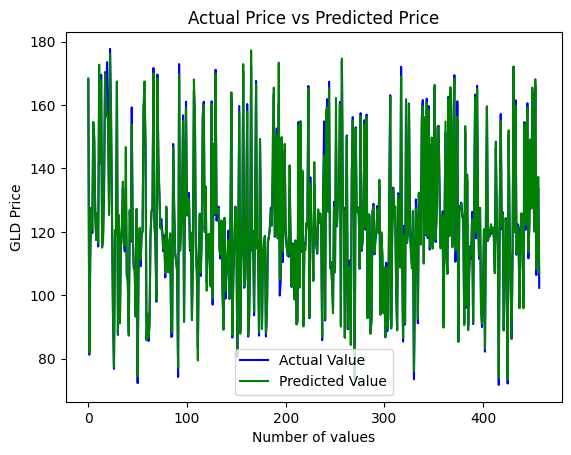

In [ ]:
plt.plot(Y_test, color='blue', label = 'Actual Value')
plt.plot(test_data_prediction, color='green', label='Predicted Value')
plt.title('Actual Price vs Predicted Price')
plt.xlabel('Number of values')
plt.ylabel('GLD Price')
plt.legend()
plt.show()